In [1]:
##################################################
# STEP 0: Load required libraries
# We need Seurat for analysis and tidyverse ( or dplyr, ggplot2) for data handling & plots
##################################################

library(Seurat)
library(tidyverse)

Warning message:
"package 'Seurat' was built under R version 4.5.2"
Loading required package: SeuratObject

Warning message:
"package 'SeuratObject' was built under R version 4.5.2"
Loading required package: sp

Warning message:
"package 'sp' was built under R version 4.5.2"

Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t


Warning message:
"package 'tidyverse' was built under R version 4.5.2"
Warning message:
"package 'ggplot2' was built under R version 4.5.2"
Warning message:
"package 'tibble' was built under R version 4.5.2"
Warning message:
"package 'tidyr' was built under R version 4.5.2"
Warning message:
"package 'readr' was built under R version 4.5.2"
Warning message:
"package 'purrr' was built under R version 4.5.2"
Warning message:
"package 'dplyr' was built under R version 4.5.2"
Warning message:
"package 'stringr' was built under R version 4.5.2"
Warning message:
"package 'forcats' was built under R version 4.5.2"

In [25]:
##################################################
# STEP 1: Import the raw count matrix 

# searched on the pubmed for scRNAseq data anaylsis, referred to the NCBI Geo dataset GSM5155198 (PMID: 41021149).

# If data downloaded in other format for eg. "tar.gz" format, then first covert it into count matrix format using cell ranger pipeline.
# If the GEO sample data is in 10X format with barcodes/genes/matrix, use Read10X(). 
# the name of your files downloaded should be "barcodes.tsv.gz", "features.tsv.gz" and "matrix.mtx.gz" for the Read10X to recognize them. if not, then rename them first if not.
# barcodes are the cells
# In this step, the count matrix is read and uploaded here as "raw_counts".
#########################################################################
list.files("C:/Users/Acer/Desktop/Veena_Patil_Lab/scRNAseq_analysis_practise/Data/patient_4", all.files = TRUE)

raw_counts <- Read10X(data.dir = "C:/Users/Acer/Desktop/Veena_Patil_Lab/scRNAseq_analysis_practise/Data/patient_4")


[1] "."                            ".."                          
 [3] ".RData"                       ".Rhistory"                   
 [5] "barcodes.tsv.gz"              "features.tsv.gz"             
 [7] "matrix.mtx.gz"                "Osteosarcoma.html"           
 [9] "osteosarcoma.ipynb"           "Osteosarcoma.R"              
[11] "Osteosarcoma_files"           "osteosarcoma_scRNA_final.rds"
[13] "Using python"

In [3]:
##################################################
# STEP 2: Create a Seurat object
# We create a Seurat object with unfiltered or raw_counts (from count matrix)
# Parameters 'min.cells = 3' is to include gene detected in at least 3 cells
# Parameters 'min.features = 200' is to include cells with at least 200 detected genes
# Parameters filters out the low expressed genes, ambient RNA or empty droplets
# view and range functions are to keep track of the changes in the metadata for every small steps.
##################################################

osteosarcoma <- CreateSeuratObject(counts = raw_counts, project = "Osteosarcoma_scRNAseq", min.cells = 3, min.features = 200)

View(osteosarcoma@meta.data)
range(osteosarcoma$nFeature_RNA)
range(osteosarcoma$nCount_RNA)
#nFeature_RNA: Number of unique genes detected per cell
#nCount_RNA: Total UMI counts per cell

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACCCAAGCGATGCA-1,Osteosarcoma_scRNAseq,8005,2398
AAACCCAAGGAGTATT-1,Osteosarcoma_scRNAseq,30822,5819
AAACCCACACAGCTTA-1,Osteosarcoma_scRNAseq,10064,2869
AAACCCACACCGTCTT-1,Osteosarcoma_scRNAseq,17417,3905
AAACCCATCGTTTACT-1,Osteosarcoma_scRNAseq,20322,4207
AAACGAAAGCACCGAA-1,Osteosarcoma_scRNAseq,3966,1629
AAACGAAAGGCGATAC-1,Osteosarcoma_scRNAseq,3403,1196
AAACGAACATAGTCGT-1,Osteosarcoma_scRNAseq,1752,228
AAACGAACATCGATGT-1,Osteosarcoma_scRNAseq,2734,1313


[1]  200 9315

[1]    500 170001

In [4]:
##################################################
# STEP 3: Calculate % mitochondrial reads and add "percent.mt" column to the metadata
# High mitochondrial percentage indicates: Stressed or dying cells, Poor cell viability
# 'percent.mt' represents mitochnodrial gene expression per cell
##################################################

osteosarcoma[["percent.mt"]] <- PercentageFeatureSet(osteosarcoma, pattern = "^MT-")
View(osteosarcoma@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<fct>,<dbl>,<int>,<dbl>
AAACCCAAGCGATGCA-1,Osteosarcoma_scRNAseq,8005,2398,5.246721
AAACCCAAGGAGTATT-1,Osteosarcoma_scRNAseq,30822,5819,6.715982
AAACCCACACAGCTTA-1,Osteosarcoma_scRNAseq,10064,2869,5.335851
AAACCCACACCGTCTT-1,Osteosarcoma_scRNAseq,17417,3905,7.647701
AAACCCATCGTTTACT-1,Osteosarcoma_scRNAseq,20322,4207,4.044877
AAACGAAAGCACCGAA-1,Osteosarcoma_scRNAseq,3966,1629,2.521432
AAACGAAAGGCGATAC-1,Osteosarcoma_scRNAseq,3403,1196,6.259183
AAACGAACATAGTCGT-1,Osteosarcoma_scRNAseq,1752,228,86.187215
AAACGAACATCGATGT-1,Osteosarcoma_scRNAseq,2734,1313,3.950256


Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


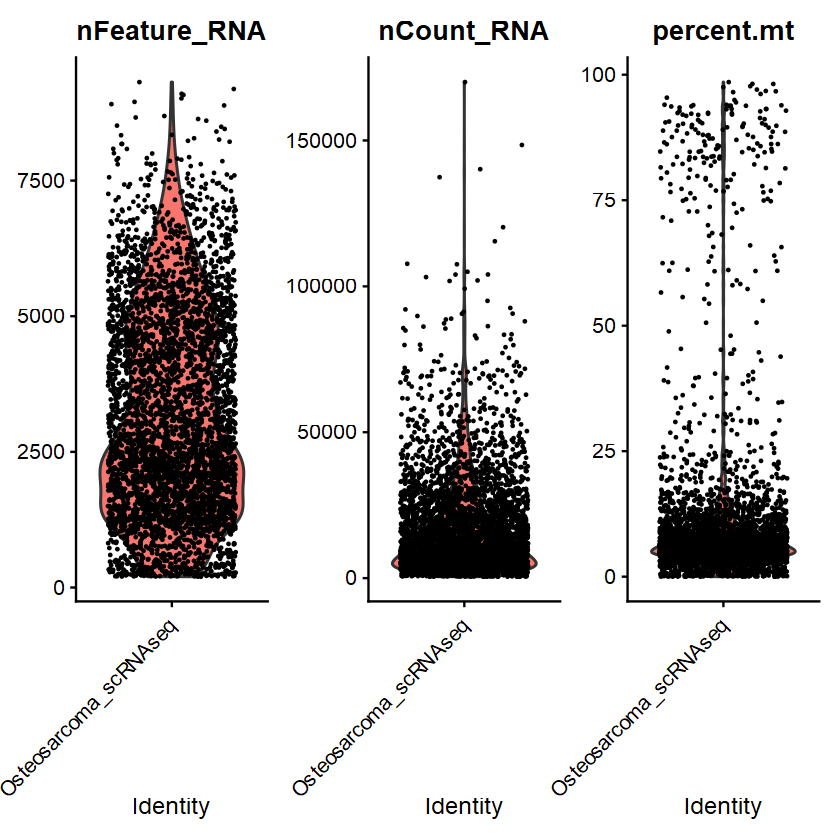

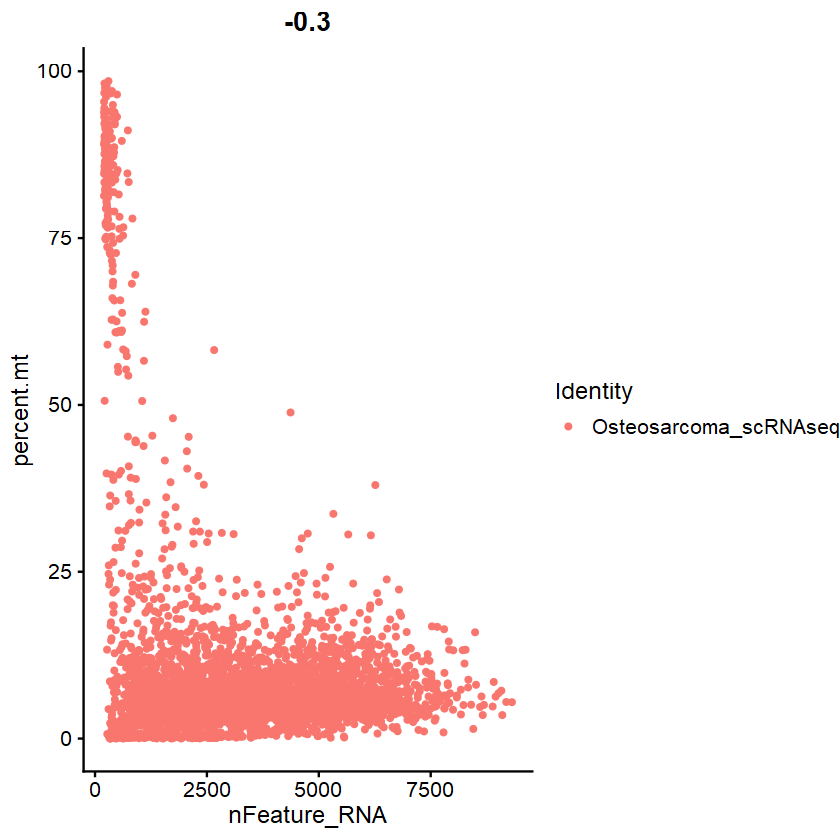

In [5]:
##################################################
# STEP 4: Visualize Quality Control (QC) metrics
# violin plot is to visualise the QC metrics across the cells. 
# This futher helps to visualise the outliers and and set filtering thresholds
##################################################

VlnPlot(osteosarcoma, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

FeatureScatter(osteosarcoma, "nFeature_RNA", "percent.mt") 
#Typically shows negative correlation: high-quality cells have moderate gene counts and low mitochondrial percentage.

In [6]:
##################################################
# STEP 5: Filter out low-quality cells
# empty droplets could  have low features and counts. while cell doublets (multiplets) would have higher values for same.
# We keep cells with enough cells, genes and low mitochondrial content 
# Here, I have kept the threshold values exactly same as mentioned in materials and method section of the article
##################################################

osteosarcoma <- subset(osteosarcoma, subset = nFeature_RNA > 500 & nFeature_RNA < 10000 & nCount_RNA < 150000 & percent.mt < 25)

range(osteosarcoma$nFeature_RNA)
range(osteosarcoma$nCount_RNA)
range(osteosarcoma$percent.mt)
#nFeature_RNA > 500: Removes empty droplets/low-quality cells
#nFeature_RNA < 10000: Removes doublets/multiplets
#nCount_RNA < 150000: Removes cells with abnormally high counts
#percent.mt < 25: Removes stressed/dying cells

[1]  515 9188

[1]    799 148452

[1]  0.00000 24.99175

In [7]:
##################################################
# STEP 6: Normalize the data
# purpose: Corrects for differences in sequencing depth between cells.
# Converts raw counts into normalized expression levels
# take a look at the data to ensure the normalization
##################################################
osteosarcoma <- NormalizeData(osteosarcoma, normalization.method = "LogNormalize", scale.factor = 10000)

osteosarcoma@assays[["RNA"]]$data@x
# Method: Log-normalization. Counts are divided by total counts per cell. Multiplied by scale factor (10,000). Natural log transformation: ln(1 + normalized_count)
# Why log transform?: Stabilizes variance. Makes data more normally distributed. Reduces impact of highly expressed genes


Normalizing layer: counts



[1] 1.2523167 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832
    [8] 0.8105832 1.5576514 0.8105832 1.2523167 0.8105832 0.8105832 0.8105832
   [15] 0.8105832 1.7912388 0.8105832 0.8105832 0.8105832 0.8105832 1.2523167
   [22] 0.8105832 1.7912388 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832
   [29] 0.8105832 1.7912388 2.8472236 0.8105832 0.8105832 0.8105832 0.8105832
   [36] 0.8105832 0.8105832 1.2523167 2.5049522 1.5576514 1.2523167 0.8105832
   [43] 0.8105832 0.8105832 1.2523167 0.8105832 0.8105832 0.8105832 2.3973273
   [50] 0.8105832 0.8105832 0.8105832 1.2523167 0.8105832 0.8105832 0.8105832
   [57] 1.2523167 1.2523167 0.8105832 0.8105832 1.5576514 1.2523167 0.8105832
   [64] 1.2523167 0.8105832 1.5576514 0.8105832 1.7912388 1.2523167 2.9171797
   [71] 1.5576514 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832
   [78] 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832 1.2523167 0.8105832
   [85] 1.7912388 1.5576514 1.5576514 1.5576514 0.8105832 1.2523167 0.8105832
   [92] 0.8105832 0.8105832 1.7912388 0.8105832 0.8105832 0.8105832 0.8105832
   [99] 0.8105832 0.8105832 1.2523167 0.8105832 0.8105832 2.5049522 0.8105832
  [106] 1.5576514 0.8105832 0.8105832 1.2523167 1.5576514 0.8105832 0.8105832
  [113] 1.2523167 0.8105832 0.8105832 1.9804629 0.8105832 0.8105832 0.8105832
  [120] 0.8105832 0.8105832 1.2523167 0.8105832 1.2523167 0.8105832 0.8105832
  [127] 0.8105832 0.8105832 0.8105832 1.2523167 0.8105832 0.8105832 0.8105832
  [134] 1.5576514 0.8105832 1.7912388 0.8105832 0.8105832 2.5049522 0.8105832
  [141] 2.3973273 0.8105832 1.2523167 0.8105832 0.8105832 0.8105832 2.6021112
  [148] 3.1017453 0.8105832 0.8105832 1.7912388 2.7720030 0.8105832 2.5049522
  [155] 1.2523167 0.8105832 0.8105832 1.2523167 0.8105832 0.8105832 1.2523167
  [162] 1.2523167 2.5049522 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832
  [169] 1.2523167 0.8105832 1.5576514 0.8105832 0.8105832 0.8105832 0.8105832
  [176] 1.2523167 2.2767066 1.9804629 1.9804629 1.7912388 0.8105832 0.8105832
  [183] 0.8105832 1.2523167 0.8105832 1.2523167 0.8105832 0.8105832 1.2523167
  [190] 0.8105832 0.8105832 0.8105832 1.7912388 1.5576514 0.8105832 1.2523167
  [197] 0.8105832 2.6021112 0.8105832 0.8105832 0.8105832 1.5576514 0.8105832
  [204] 0.8105832 0.8105832 1.7912388 0.8105832 0.8105832 0.8105832 0.8105832
  [211] 0.8105832 3.4333826 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832
  [218] 0.8105832 0.8105832 0.8105832 3.3493012 0.8105832 0.8105832 0.8105832
  [225] 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832
  [232] 0.8105832 1.2523167 0.8105832 1.5576514 2.8472236 0.8105832 0.8105832
  [239] 0.8105832 0.8105832 1.5576514 2.7720030 1.2523167 0.8105832 0.8105832
  [246] 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832 1.2523167 0.8105832
  [253] 0.8105832 0.8105832 0.8105832 1.7912388 2.2767066 0.8105832 0.8105832
  [260] 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832 1.2523167 0.8105832
  [267] 0.8105832 1.2523167 0.8105832 1.5576514 0.8105832 1.2523167 0.8105832
  [274] 1.5576514 0.8105832 1.7912388 2.8472236 1.2523167 0.8105832 0.8105832
  [281] 2.9171797 1.2523167 0.8105832 0.8105832 0.8105832 2.1395149 2.6906607
  [288] 0.8105832 0.8105832 2.1395149 1.9804629 1.5576514 0.8105832 0.8105832
  [295] 1.2523167 0.8105832 0.8105832 1.5576514 0.8105832 1.2523167 2.7720030
  [302] 0.8105832 0.8105832 1.7912388 1.2523167 0.8105832 0.8105832 0.8105832
  [309] 0.8105832 0.8105832 0.8105832 3.1564022 1.2523167 0.8105832 0.8105832
  [316] 0.8105832 0.8105832 0.8105832 0.8105832 1.2523167 0.8105832 1.7912388
  [323] 0.8105832 1.2523167 0.8105832 1.7912388 1.2523167 0.8105832 0.8105832
  [330] 1.7912388 5.0083466 4.1305438 1.5576514 0.8105832 1.2523167 1.5576514
  [337] 0.8105832 0.8105832 0.8105832 0.8105832 1.2523167 0.8105832 0.8105832
  [344] 0.8105832 0.8105832 1.2523167 0.8105832 2.3973273 1.7912388 2.5049522
  [351] 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832 0.8105832 1.2523167
  [358] 0.8105832 0.810583

An object of class Seurat 
20369 features across 3986 samples within 1 assay 
Active assay: RNA (20369 features, 0 variable features)
 2 layers present: counts, data

Finding variable features for layer counts



An object of class Seurat 
20369 features across 3986 samples within 1 assay 
Active assay: RNA (20369 features, 2000 variable features)
 2 layers present: counts, data

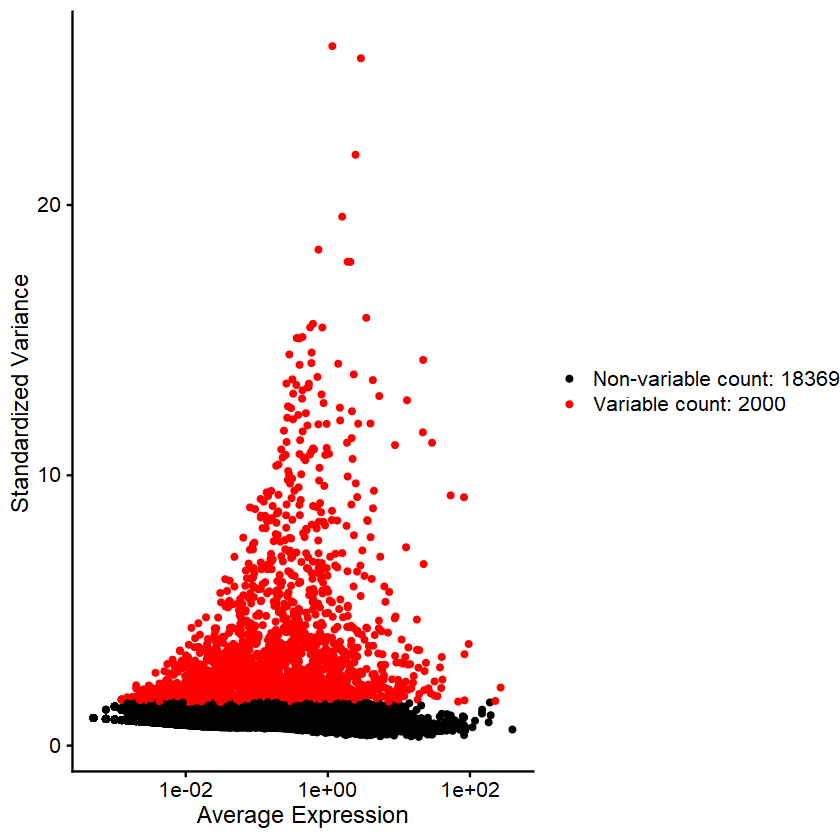

In [8]:
##################################################
# STEP 7: Identify highly variable genes
# Purpose: Identifies genes that show high cell-to-cell variation
# Why important?: These genes drive biological differences between cell types
# Method: "vst" (variance stabilizing transformation). Models mean-variance relationship. Selects top 2000 variable genes
##################################################
osteosarcoma

osteosarcoma <- FindVariableFeatures(osteosarcoma, selection.method = "vst", nfeatures = 2000)

osteosarcoma

#take a look at the variable features using a plot. this visualises mean expression vs variance
VariableFeaturePlot(osteosarcoma)


In [9]:
##################################################
# STEP 8: Data Scaling
# Purpose: Centers and scales gene expression values.
# Why scale?: Prevents highly expressed genes from dominating PCA
# Equal contribution from all genes. Required for dimensionality reduction
# Transformation: For each gene: (expression - mean)/standard deviation
# Note: Scaling all genes is memory-intensive. Often done only on variable genes
##################################################

all_genes <- rownames(osteosarcoma)
osteosarcoma <- ScaleData(osteosarcoma, features = all_genes)


Centering and scaling data matrix



In [10]:
##################################################
# STEP 9: PCA (linear dimensionality reduction)
# Reduces thousands of genes into principal components for better visualisation
# Purpose: Reduces dimensionality while preserving variance.
# Uses only variable genes (computationally efficient). Calculates 50 principal components.
##################################################

osteosarcoma <- RunPCA(osteosarcoma, features = VariableFeatures(osteosarcoma), npcs = 50)

# Shows top genes contributing to each PC.
print(osteosarcoma[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  COL1A1, CTHRC1, COL1A2, S100A13, COL5A2, MXRA8, CPE, CDKN2A, SPARC, TPM2 
	   SOX4, BGN, SERPINF1, CREB3L1, MDK, CYR61, IGF1R, IBSP, ALPL, IFITM5 
	   PTH1R, STMN1, CSRP2, CDH2, PCDH18, FRMD6, LMO7, PLOD2, SNX7, CA3 
Negative:  CD68, CD74, SPI1, CD14, LYZ, HLA-DRA, CXCL8, CSF1R, IL1B, NPC2 
	   HLA-DPA1, ANPEP, FTL, CXCL2, CCL3, HLA-DRB1, GRN, CXCL3, PTPRE, CD4 
	   RGS10, CTSH, HLA-DMA, CTSB, RNASE1, RNASE6, ATP6V0E1, HLA-DPB1, CCL4, C15orf48 
PC_ 2 
Positive:  CA3, IFITM5, CREB3L1, PTH1R, RHBDL2, CDH2, CD24, PRSS35, SP7, CPE 
	   CDKN2A, IBSP, NPB, PTPRZ1, DLX4, SLC8A3, ANO5, COL11A2, ASPSCR1, PHOSPHO1 
	   HSPB11, COCH, PFN2, BAMBI, ENHO, IGF1R, UCHL1, RCOR2, OPN3, ALPL 
Negative:  SPARCL1, COL4A1, ADGRL4, COL4A2, PLVAP, COL15A1, PXDN, ARHGAP29, ESAM, NFIB 
	   CDH5, IGFBP7, CAV1, RAMP2, EMCN, CLEC14A, VWF, MMRN2, LAMC1, CAVIN1 
	   CD34, CXorf36, ADGRF5, ECSCR, TIE1, LDB2, PCDH17, KDR, LAMB1, CALCRL 
PC_ 3 
Positive:  TIMP1, ISG20, LTB, VCAN, BCL2A1, AREG, KLF2, T

PC_ 1 
Positive:  COL1A1, CTHRC1, COL1A2, S100A13, COL5A2 
Negative:  CD68, CD74, SPI1, CD14, LYZ 
PC_ 2 
Positive:  CA3, IFITM5, CREB3L1, PTH1R, RHBDL2 
Negative:  SPARCL1, COL4A1, ADGRL4, COL4A2, PLVAP 
PC_ 3 
Positive:  TIMP1, ISG20, LTB, VCAN, BCL2A1 
Negative:  SIGLEC15, SLC9B2, THOP1, ATP6V0D2, ACP5 
PC_ 4 
Positive:  PLVAP, CDH5, RAMP2, UBE2C, NUSAP1 
Negative:  COL6A3, C1S, COL6A1, COL3A1, RARRES2 
PC_ 5 
Positive:  UBE2C, TOP2A, DLGAP5, CCNA2, ASPM 
Negative:  AK5, CKB, SIGLEC15, SLC9B2, ITGA2 


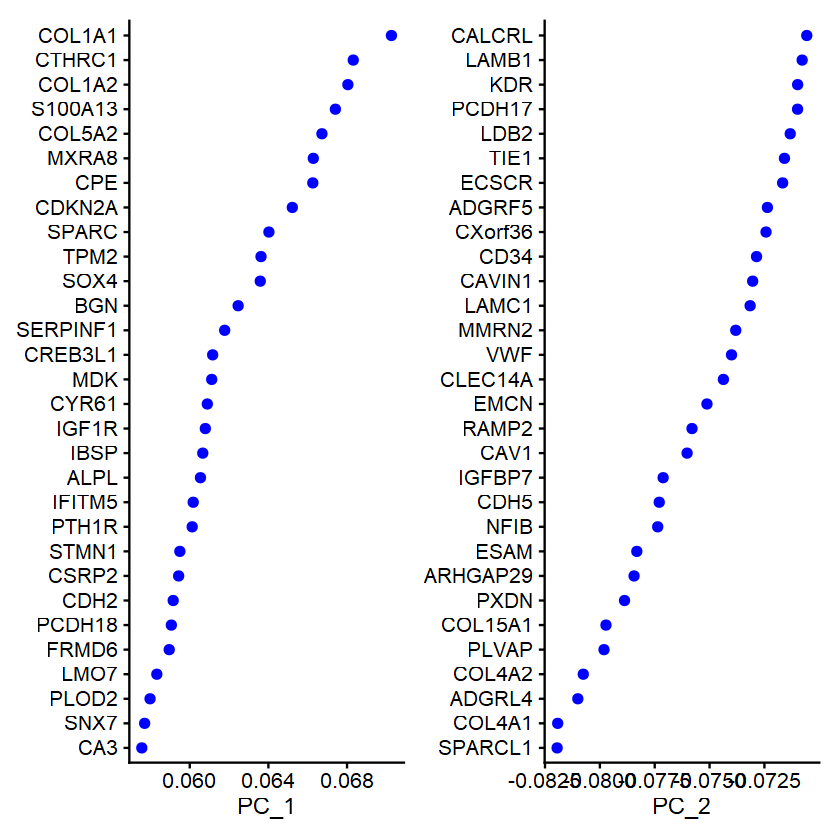

In [11]:
# Visualizes gene loadings for PCs 1 and 2
VizDimLoadings(osteosarcoma, dims = 1:2, reduction = "pca")


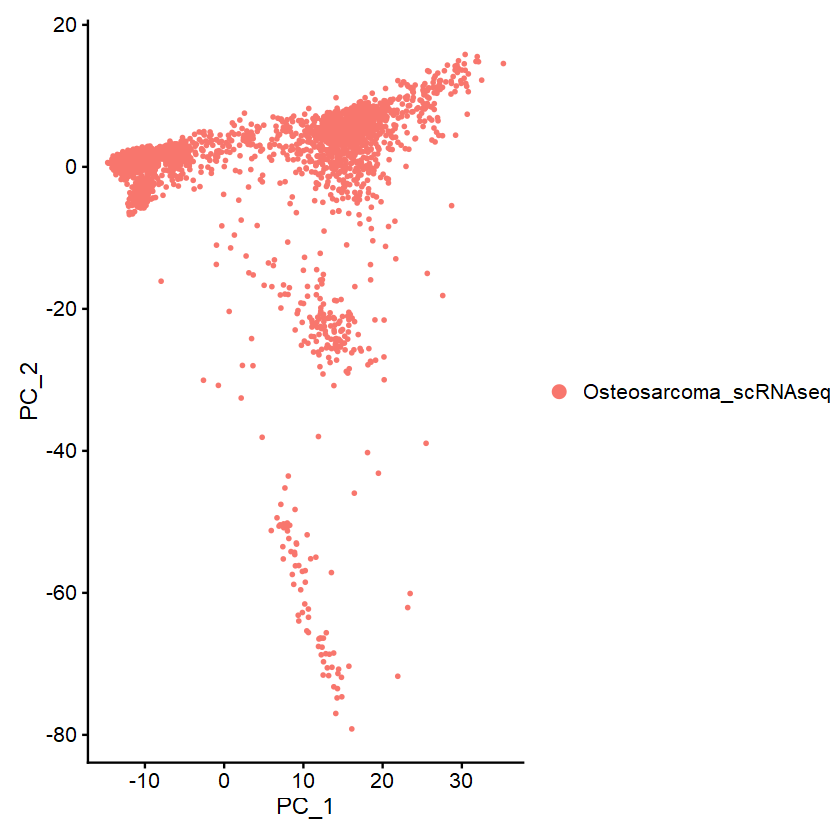

In [12]:
# examine and view PCA results in a different ways 
# for eg. DimPlot(), VizDimReduction(), and DimHeatmap()
# Dimplot: Projects cells in 2D PCA space.
DimPlot(osteosarcoma, reduction = "pca", dims = c(1,2))

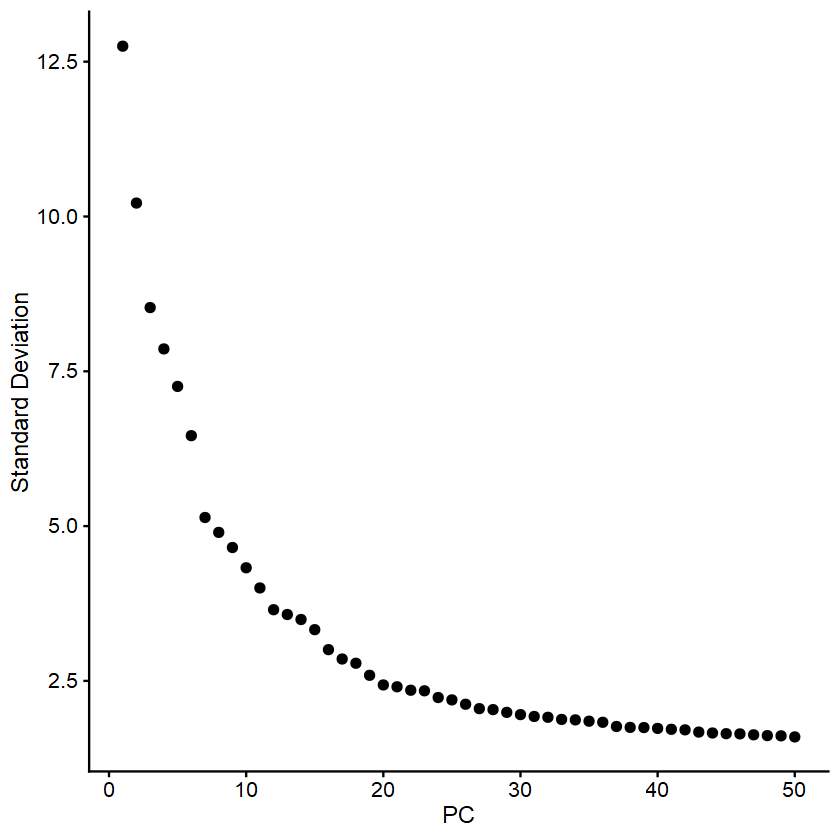

In [13]:
# Elbow plot ranks the PCs based on their standard deviation.
# Purpose: Determines how many PCs to use for downstream analysis.

ElbowPlot(osteosarcoma, ndims = 50)

In [14]:
##################################################
# STEP 10: Finding neighbors and clusters
# The cluster of the cells are formed based on the PCA scores
# values mentioned are followed from the article
# Purpose: Builds a k-nearest neighbor graph.

# Parameters: dims = 1:20: Uses first 20 PCs. k.param = 20: 20 nearest neighbors
# Creates a shared nearest neighbor (SNN) graph for clustering.
##################################################

osteosarcoma <- FindNeighbors(osteosarcoma, dims = 1:20, k.param = 20)
osteosarcoma <- FindClusters(osteosarcoma, resolution = 0.5, algorithm = 1)

Computing nearest neighbor graph

Warning message:
"package 'future' was built under R version 4.5.2"
Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3986
Number of edges: 128548

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9227
Number of communities: 14
Elapsed time: 0 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
10:28:09 UMAP embedding parameters a = 0.9922 b = 1.112

10:28:09 Read 3986 rows and found 20 numeric columns

10:28:09 Using Annoy for neighbor search, n_neighbors = 30

10:28:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:28:10 Writing NN index file to temp file C:\Users\Acer\AppData\Local\Temp\Rtmpm8Y3Zr\file633462251632

10:28:10 Searching Annoy index using 1 thread, search_k = 3000

10:28:12 Annoy recall = 100%

10:28:12 Commencing smooth kNN distance calibration using 1 threa

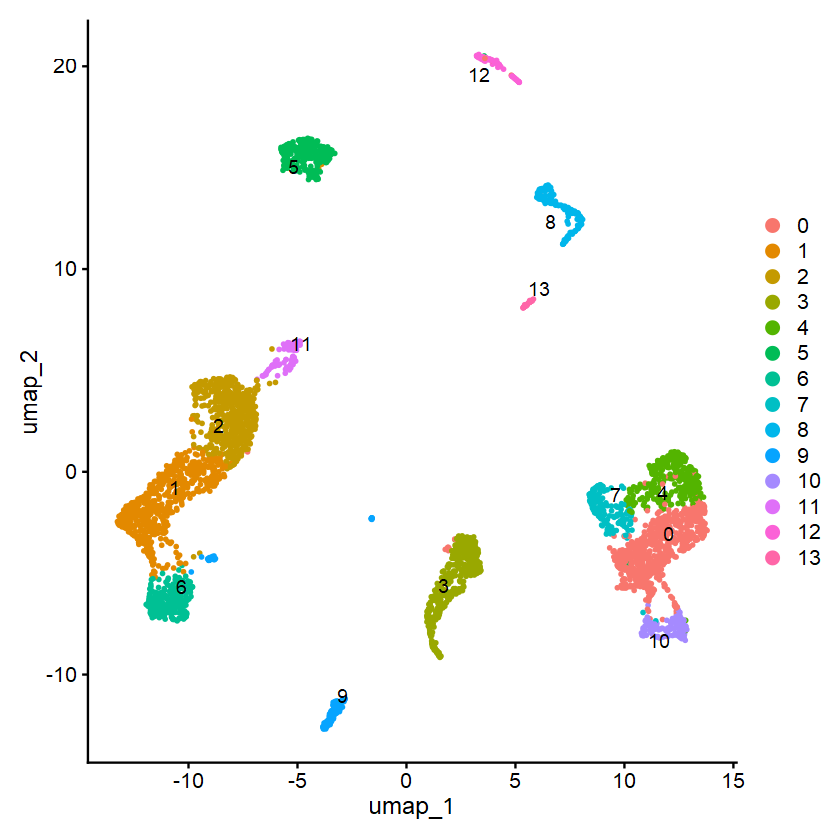

In [15]:
##################################################
# STEP 11: non-linear dimensional reduction (UMAP/tSNE)
# Displays cells in 2D, based on their transcriptomes 
##################################################
# values mentioned are followed from the article
# UMAP: Uniform Manifold Approximation and Projection. Preserves both local and global structure better than t-SNE.
# Parameters:
#n.neighbors: Local neighborhood size (balances local/global structure)
#min.dist: Minimum distance between points (controls clustering)


osteosarcoma <- RunUMAP(osteosarcoma, dims = 1:20, n.neighbors = 30, min.dist = 0.3)
DimPlot(osteosarcoma, reduction = "umap", label = TRUE, repel = TRUE)

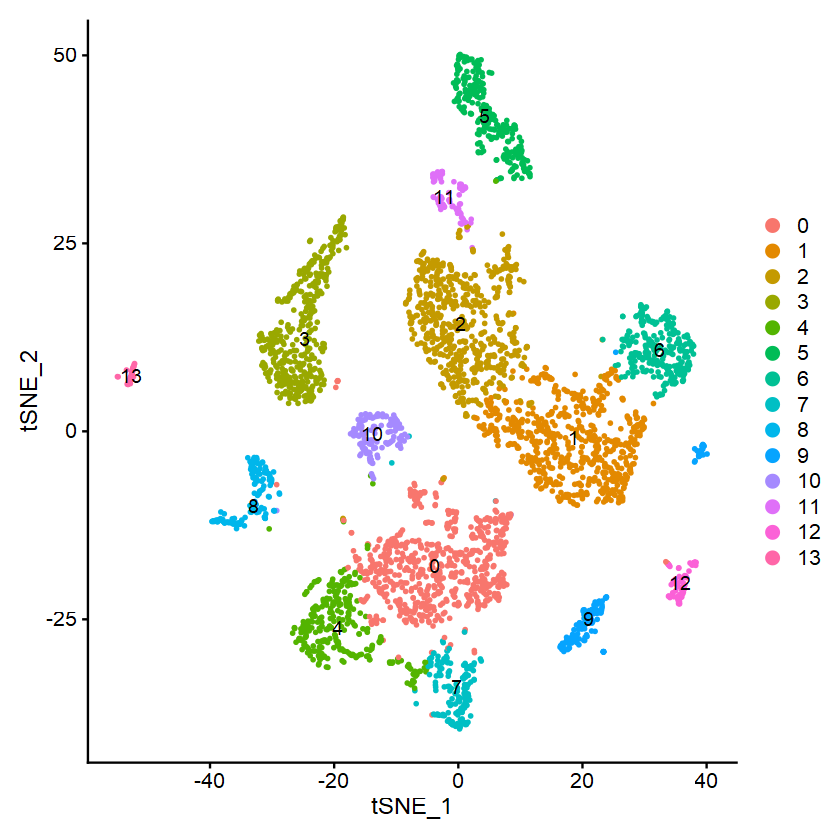

In [16]:
# t-SNE: t-Distributed Stochastic Neighbor Embedding. Emphasizes local structure over global structure.
osteosarcoma <- RunTSNE(object = osteosarcoma, dims = 1:20)
DimPlot(object = osteosarcoma, reduction = "tsne", label = TRUE)

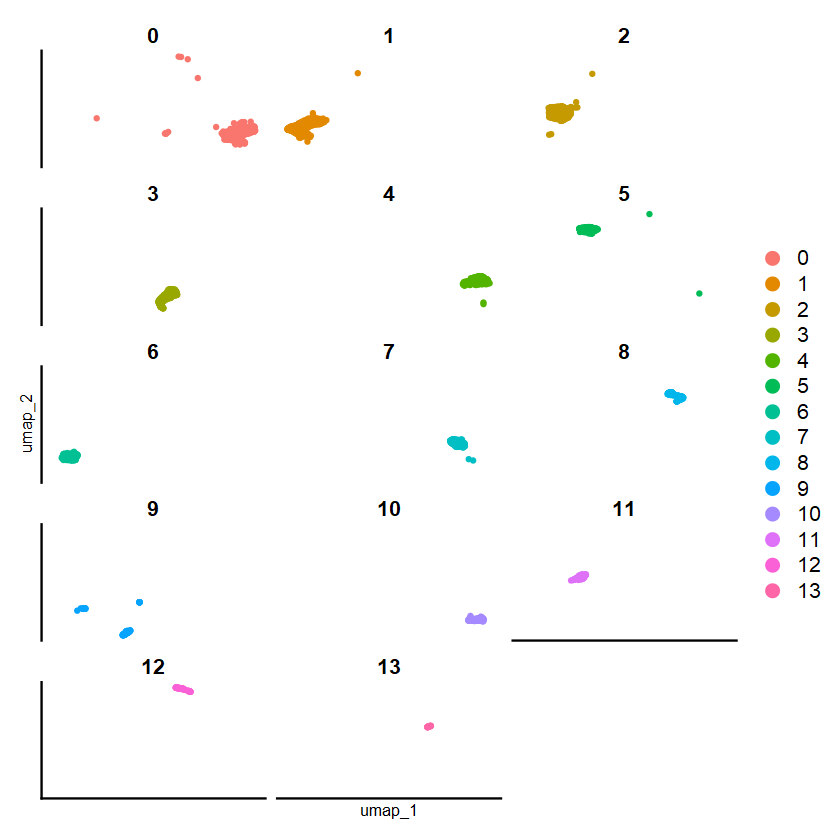

In [17]:
# for the paper style UMAP
DimPlot(osteosarcoma,reduction = "umap", split.by = "seurat_clusters",
  ncol = 3, pt.size = 0.6) + theme(
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    axis.title = element_text(size = 10))

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13



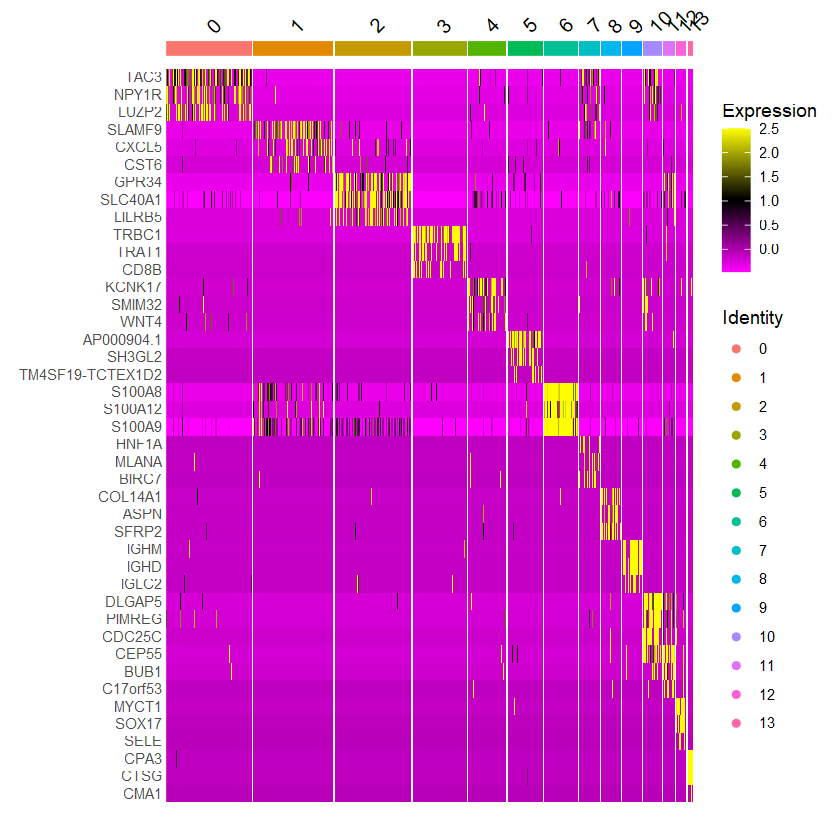

In [18]:
##################################################
# STEP 12: Find marker genes for clusters
# These help us identify what cell types each cluster represents
# Purpose: Identifies differentially expressed genes for each cluster.
# Parameters:
#only.pos = TRUE: Only positive markers (higher in cluster vs others)
#min.pct = 0.25: Gene expressed in at least 25% of cells in cluster
#logfc.threshold = 0.25: Minimum log2 fold change
#Uses Wilcoxon rank sum test by default.
##################################################

os_markers <- FindAllMarkers(osteosarcoma, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

# tried to get the paper style heatmap, but its more like tutorial one 
# Creates a heatmap of top marker genes for each cluster
top10 <- os_markers %>% group_by(cluster) %>% top_n(n = 3, wt = avg_log2FC)
DoHeatmap(osteosarcoma, features = top10$gene, group.by = "seurat_clusters", size = 4)


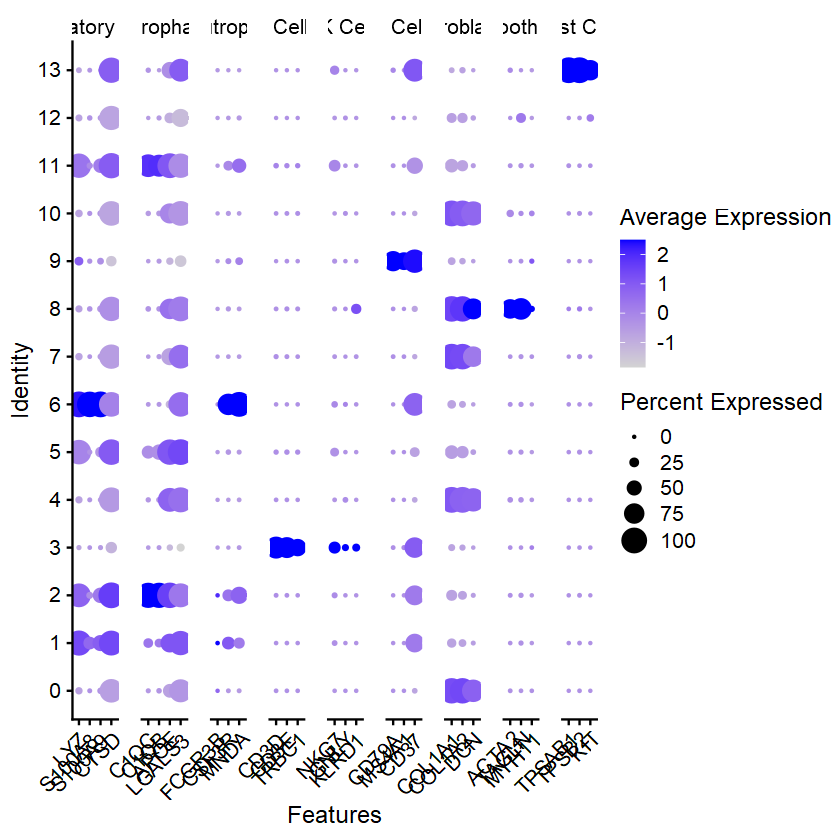

In [21]:
#Name the cell types according to what the article mentions and plot it back on the UMAP/tSNE
Idents(osteosarcoma) <- "seurat_clusters"


# Defines known marker genes for expected cell types in osteosarcoma.
canonical.markers <- list(
  "Inflammatory Myeloid" = c("LYZ", "S100A8", "S100A9", "CTSD"),
  "Macrophages" = c("C1QC", "C1QB", "APOE", "LGALS3"),
  "Neutrophils" = c("FCGR3B", "CSF3R", "MNDA"),
  "T Cells" = c("CD3D", "CD3E", "TRBC1"),
  "NK Cells" = c("NKG7", "GNLY", "KLRD1"),
  "B Cells" = c("CD79A", "MS4A1", "CD37"),
  "Fibroblasts" = c("COL1A1", "COL1A2", "DCN"),
  "Vascular Smooth Muscle Cells" = c("ACTA2", "TAGLN", "MYH11"),
  "Mast Cells" = c("TPSAB1", "TPSB2", "KIT")
)

# Visualizes expression of canonical markers across clusters.
# make a dot plot to ensure the canonical markers expression and confirm the cell types
DotPlot(
  osteosarcoma,
  features = canonical.markers) + RotatedAxis()

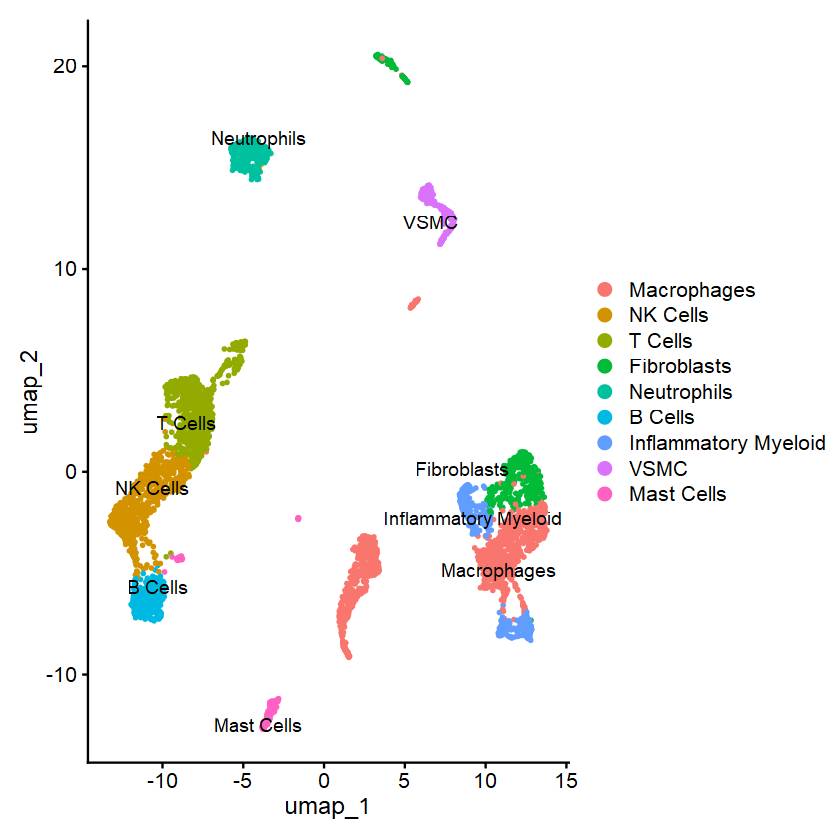

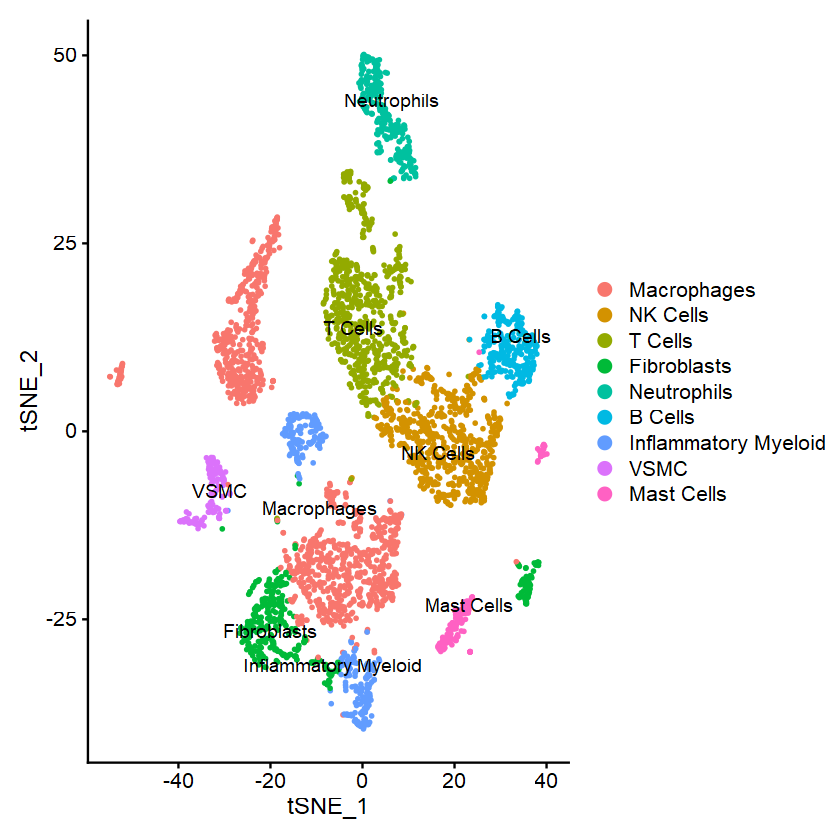

In [22]:
#Name the clusters 
#Manually annotates clusters based on marker expression.
#Matches clusters to known cell types from literature.
new.cluster.ids <- c(
  "Macrophages",        # 0
  "NK Cells",           # 1
  "T Cells",            # 2
  "Macrophages",        # 3
  "Fibroblasts",        # 4
  "Neutrophils",        # 5
  "B Cells",            # 6
  "Inflammatory Myeloid", # 7
  "VSMC",               # 8
  "Mast Cells",         # 9
  "Inflammatory Myeloid", # 10
  "T Cells",            # 11
  "Fibroblasts",        # 12
  "Macrophages"         # 13
)

names(new.cluster.ids) <- levels(osteosarcoma)
osteosarcoma <- RenameIdents(osteosarcoma, new.cluster.ids)

DimPlot(osteosarcoma, reduction = "umap", label = TRUE, repel = TRUE)
DimPlot(osteosarcoma, reduction = "tsne", label = TRUE, repel = TRUE)


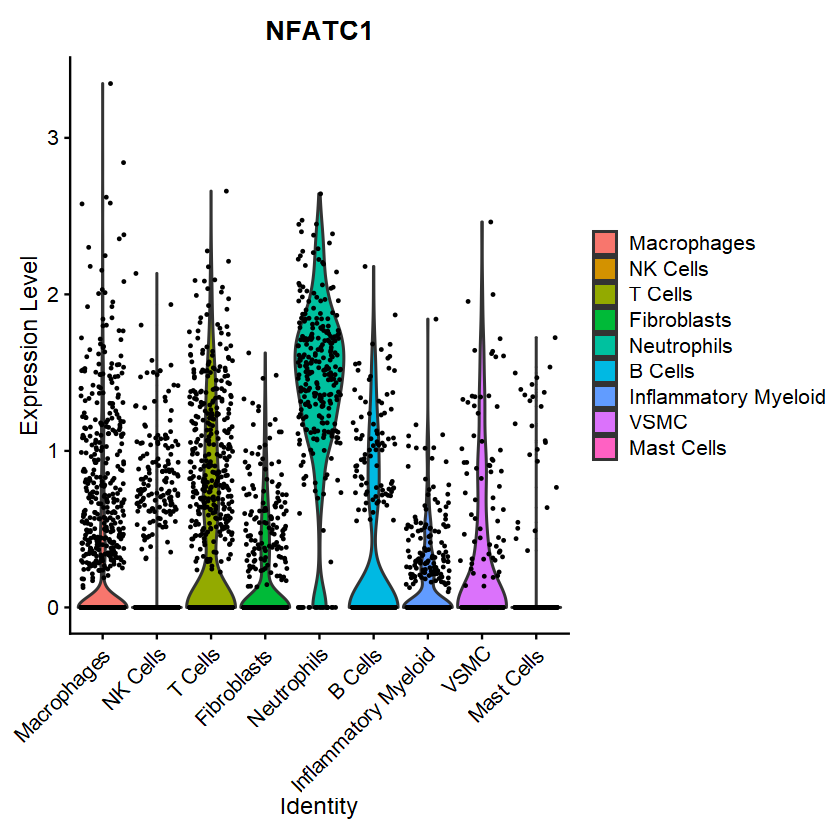

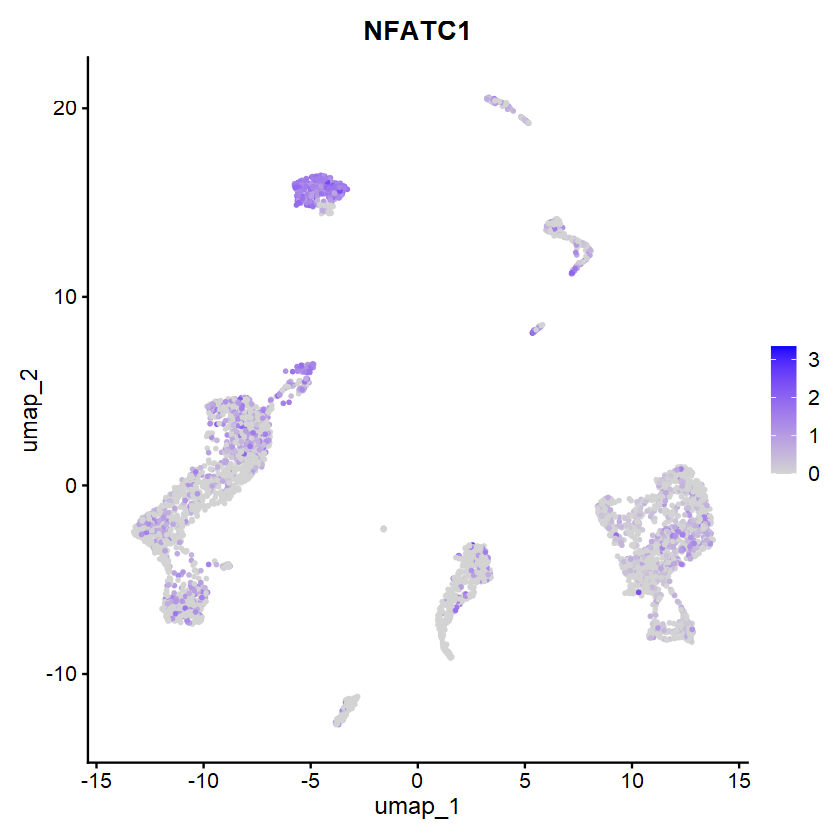

In [23]:
#violin plot for NFATC1 expression across the cells
VlnPlot(osteosarcoma, features = "NFATC1", pt.size = 0.1)
FeaturePlot(osteosarcoma, features = "NFATC1")

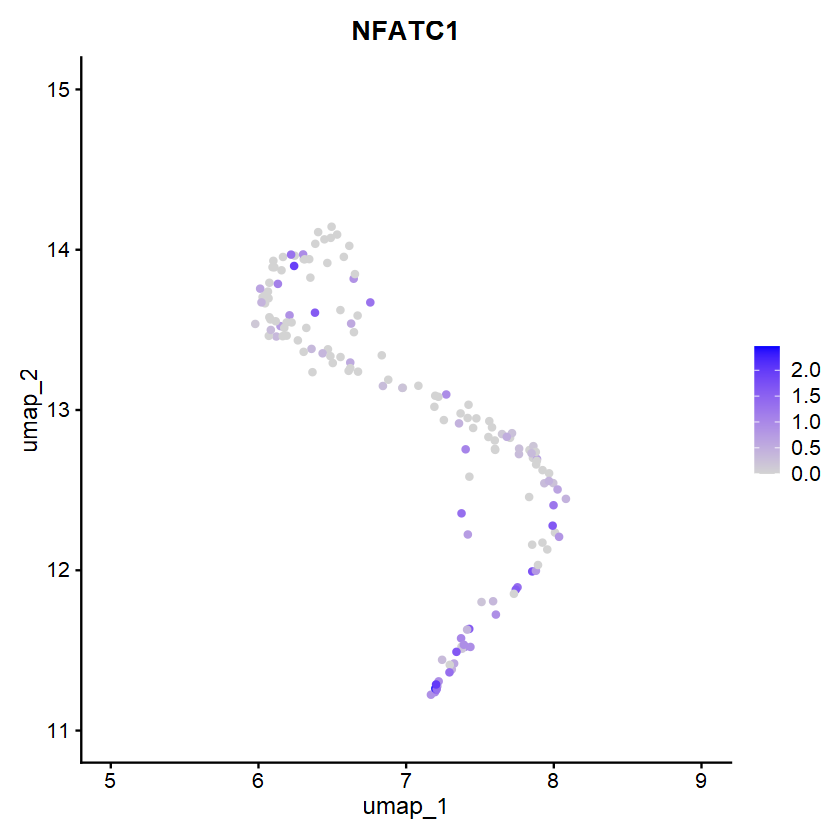

In [24]:
#for NFATc1 expression in Vascular Smooth Muscle Cells (VMSCs)
vsmc <- subset(osteosarcoma, idents = "VSMC")
FeaturePlot(vsmc, features = "NFATC1", reduction = "umap", pt.size = 1.2)